In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from tkinter import filedialog
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

In [2]:
def data_collection(file_name):
    # loading the data from csv file to a Pandas DataFrame
    global customer_data
    customer_data = pd.read_csv(file_name)
    # getting some informations about the dataset
    print('Info about dataset: ')
    print()
    print(customer_data)
    print(customer_data.info())

In [3]:
#finding the number of rows and dataset
# customer_data.shape

In [4]:

#checking for missing values
# customer_data.isnull().sum()

In [5]:
#get annual income column and get spending Score column
def choose_cols(i1,i2):
    X1 = customer_data.iloc[:,[i1,i2]].values
    return X1
    

In [6]:

def elbow_graph(X1):
    # finding wcss value for different number of clusters
    wcss = []   #within clusters sum of square
    for i in range(1,11):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(X1)
        wcss.append(kmeans.inertia_)  #wscc values give
        

    # plot an elbow graph
    sns.set()
    plt.figure(figsize=(5,5))
    plt.plot(range(1,11), wcss)
    plt.title('The Elbow Point Graph')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.show()
        

In [7]:
kmeans= None
def train_model(cluster_no):
    global kmeans
    kmeans = KMeans(n_clusters=cluster_no, init='k-means++', random_state=0)

    # return a label for each data point based on their cluster
    cluster_grps = kmeans.fit_predict(X1)
    return cluster_grps

In [8]:
def plot_clusters(X1,Y1,i1,i2,cn):
    # plotting all the clusters and their Centroids
    colors=['green','red','yellow','blue','violet','orange','brown']
    plt.figure(figsize=(6,6))
    for i in range(cn):
        plt.scatter(X1[Y1==i,0], X1[Y1==i,1], s=50, c=colors[i], label=f'Cluster {i}')

    # plot the centroids
    plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

    plt.title('Customer Groups')
    plt.xlabel(customer_data.columns[i1])
    plt.ylabel(customer_data.columns[i2])
    plt.legend()
    plt.show()

    print('Tabular analysis: ')
    centroids=kmeans.cluster_centers_
    print(pd.DataFrame(centroids,columns=[customer_data.columns[i1],customer_data.columns[i2]]))

Info about dataset: 

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data c

C:\Users\muskan\AppData\Roaming\Python\Python312\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\muskan\AppData\Roaming\Python\Python312\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Program Files\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Program Files\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Program Files\Python312\Lib\subprocess.py", line 1538, in _execute_

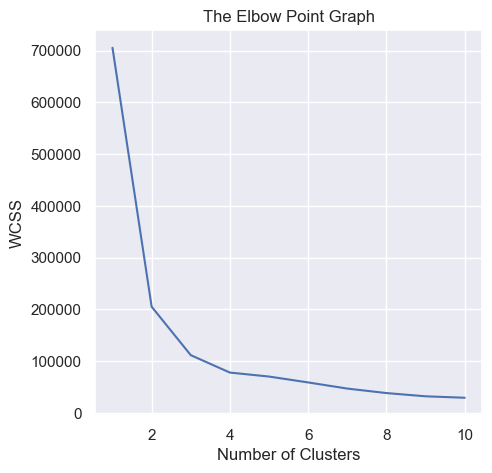

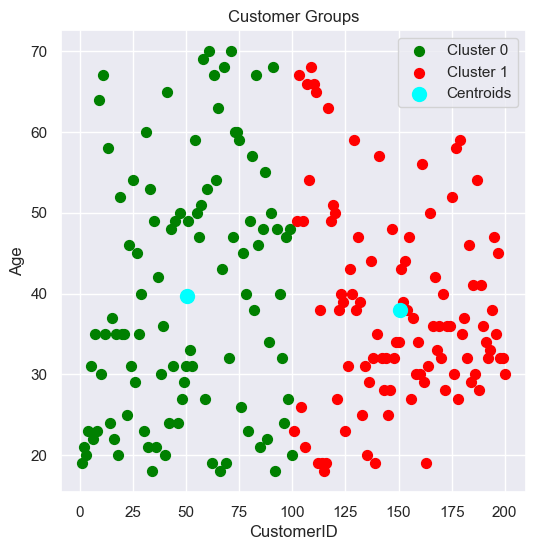

Tabular analysis: 
   CustomerID    Age
0        50.5  39.75
1       150.5  37.95
Choose two columns for clustering


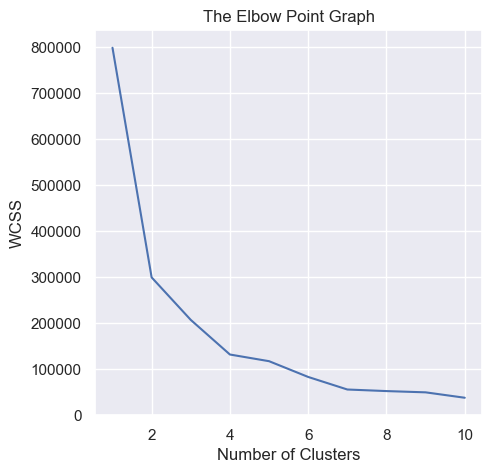

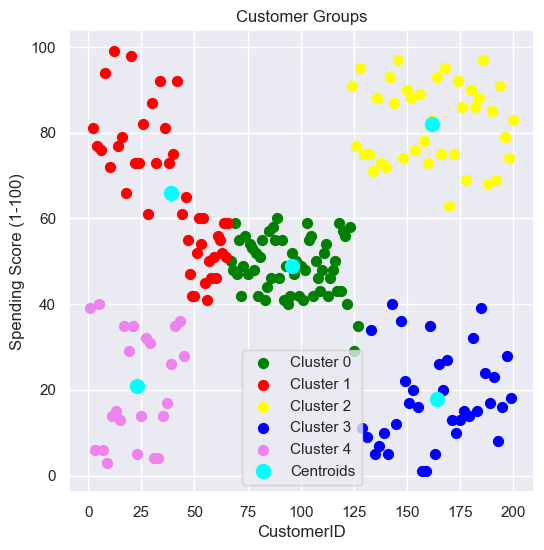

Tabular analysis: 
   CustomerID  Spending Score (1-100)
0   96.050847               48.847458
1   39.116279               65.813953
2  162.000000               82.128205
3  164.000000               17.888889
4   23.000000               20.913043
ThankYou


In [12]:
customer_data=None
file_name=str(input('Enter file name: '))
data_collection(file_name)

choice=''
while(choice.lower()!='q'):
    print('Choose two columns for clustering')
    i1=int(input('Index 1: '))
    i2=int(input('Index 2: '))
    X1=choose_cols(i1,i2)
    #print(X1)
    elbow_graph(X1)
    
    cluster_no=int(input('Enter optimal number of clusters from elbow graph: '))
    cluster_grps=train_model(cluster_no)
    
    plot_clusters(X1,cluster_grps,i1,i2,cluster_no)
    choice=str(input('Press any key fro another cluster graph or press (q) to exit: '))
print('ThankYou')